In [2]:
!pip install linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 8.4 MB/s eta 0:00:00


In [3]:
import math
import warnings
warnings.filterwarnings('ignore')

from IPython.display import YouTubeVideo
from linearmodels.panel import PanelOLS, RandomEffects
from linearmodels.panel.data import PanelData
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson

%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bollybait-a-clickbait-categorization-bollywood-c/BollyBAIT_dataset.csv


In [4]:
df=pd.read_csv("/kaggle/input/bollybait-a-clickbait-categorization-bollywood-c/BollyBAIT_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Title                     996 non-null    object
 1   Video ID                  996 non-null    object
 2   Video URL                 996 non-null    object
 3   Channel Title             996 non-null    object
 4   Misleading Video          996 non-null    object
 5   False Promises            996 non-null    object
 6   Exaggerated Video         996 non-null    object
 7   Spam Content              996 non-null    object
 8   Exploits Curiosity Gap :  996 non-null    object
 9   Label                     996 non-null    object
dtypes: object(10)
memory usage: 77.9+ KB


In [23]:
df['Label']='Real'

In [6]:
y_multi = df["Label"]
x_multi = df.drop(["Label"], axis = 1)

In [7]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size = 0.2, random_state = 42)
# print(X_test)
# print(df.columns.values)

In [21]:
import sklearn
df1=pd.get_dummies(df[['Misleading Video','False Promises ', 'Exaggerated Video' ,'Spam Content ','Exploits Curiosity Gap :','Label']], dtype = int, drop_first =True)
df1

,Misleading Video_Yes,False Promises _Yes,Exaggerated Video_Yes,Spam Content _Yes,Exploits Curiosity Gap :_Yes,Label_Real
0,0,1,1,0,0,0
1,0,1,1,0,0,0
2,1,1,1,0,0,0
3,0,1,1,0,0,0
4,1,1,1,1,0,0
...,...,...,...,...,...,...
991,0,0,0,0,0,1
992,0,0,0,0,0,1
993,0,0,0,0,0,1
994,0,0,0,0,0,1


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop(["Label_Real"], axis = 1), df1["Label_Real"], test_size = 0.2, random_state = 42)
df1["Label_Real"]

0      0
1      0
2      0
3      0
4      0
      ..
991    1
992    1
993    1
994    1
995    1
Name: Label_Real, Length: 996, dtype: int64

In [10]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
p=model.predict(X_test)
sc=model.score(X_test, y_test)
print("Accuracy:",sc)

Accuracy: 1.0


**Cross Validtion to check for overfitting**

In [11]:
import numpy as np
from sklearn.model_selection import cross_val_score, learning_curve, train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

num_folds = 5
cross_val_scores = cross_val_score(model, X_train, y_train, cv=num_folds)

mean_accuracy = np.mean(cross_val_scores)
print(f'Mean Cross-Validation Accuracy: {mean_accuracy:.2f}')

Mean Cross-Validation Accuracy: 1.00


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization =TfidfVectorizer()
xv_train= vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)

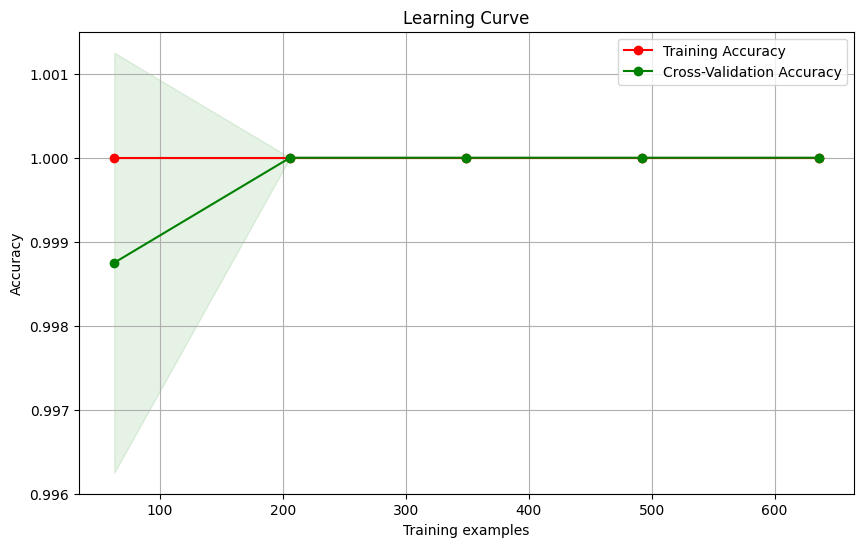

In [13]:

def plot_learning_curve(model, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Accuracy")
    plt.legend(loc="best")

plot_learning_curve(model, X_train, y_train, cv=num_folds)
plt.show()


In [14]:
df1.dtypes.sample(6)

Misleading Video_Yes            int64
Label_Real                      int64
Spam Content _Yes               int64
False Promises _Yes             int64
Exploits Curiosity Gap :_Yes    int64
Exaggerated Video_Yes           int64
dtype: object

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2:.2f}')


RMSE: 0.22
R-squared (R2) Score: 0.80


In [16]:
print(X_test)
print(y_test.size)
orig_arr=np.array(y_pred)
y_pred_reshape = orig_arr.reshape(-1, 1)

print(y_pred_reshape.size)

     Misleading Video_Yes  False Promises _Yes  Exaggerated Video_Yes  \
726                     0                    0                      0   
99                      0                    1                      0   
453                     1                    1                      0   
765                     0                    0                      0   
485                     1                    1                      0   
..                    ...                  ...                    ...   
639                     0                    0                      0   
26                      1                    0                      1   
484                     1                    1                      0   
186                     1                    1                      0   
830                     0                    0                      0   

     Spam Content _Yes  Exploits Curiosity Gap :_Yes  
726                  0                             0  
99           

In [17]:
# plt.scatter(X_test, y_test, color="blue",label='Actual data')
# plt.plot(X_test, y_pred_reshape, colour='r',linewidth=2, label='Linear Regression Line')
# plt.title('Linear Regression')
# plt.xlabel('X_test')
# plt.ylabel('y_test')
# plt.legend()
# plt.grid(True)

# plt.show()

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
decision_tree= DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


**CHECKING FOR OVERFITTING!**

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()

scores = cross_val_score(model, X_train, y_train, cv=5)
mean_score = np.mean(scores)
std_score = np.std(scores)

print("Cross-Validation Scores:")
print(scores)
print(f"Mean Accuracy: {mean_score:.2f}")
print(f"Standard Deviation: {std_score:.2f}")

Cross-Validation Scores:
[1. 1. 1. 1. 1.]
Mean Accuracy: 1.00
Standard Deviation: 0.00


In [24]:

param_grid = {
    'max_depth': [None, 10, 11, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("best Hyperparameters:")
print(best_params)
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 1.00
